Image Classification

In [39]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from PIL import Image

In [40]:
(X_train, y_train), (X_test,y_test) = datasets.fashion_mnist.load_data()

In [41]:
X_test.shape
y_train.shape

(60000,)

In [42]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [43]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [45]:
def plot_sample(X, y, index):
    plt.figure(figsize=(12, 4))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])
    plt.show()

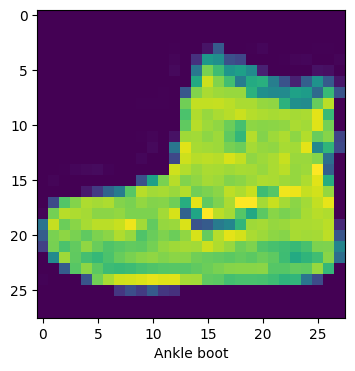

In [46]:
plot_sample(X_train, y_train, 0)

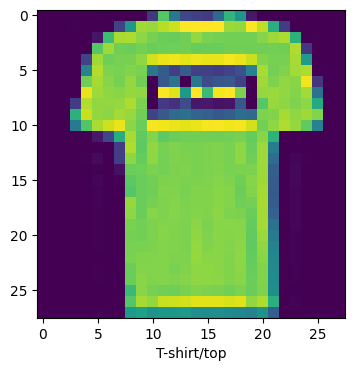

In [47]:
plot_sample(X_train, y_train, 1)

In [48]:
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5

In [49]:
from tensorflow.keras import layers, models

ann = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),  
    layers.Dropout(0.4),                  
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    
    layers.Dense(10, activation='softmax')
])


ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [50]:
y_pred = ann.predict(X_test)
y_pred_class_names = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_class_names))

313/313 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.04      0.01      0.01      1000
           3       0.00      0.00      0.00      1000
           4       0.07      0.28      0.11      1000
           5       0.06      0.01      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.18      0.78      0.30      1000
           8       0.16      0.14      0.15      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.05      0.12      0.06     10000
weighted avg       0.05      0.12      0.06     10000



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

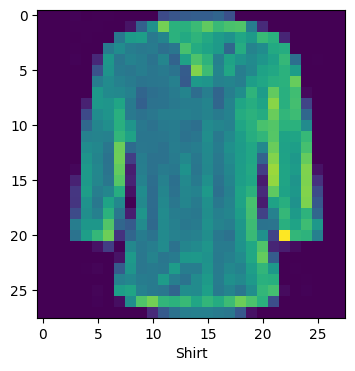

In [51]:
plot_sample(X_test, y_test,4)

In [52]:
class_names[y_pred_class_names[4]]

'Sneaker'

In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [54]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
cnn.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.6879 - accuracy: 0.7546 - val_loss: 0.4729 - val_accuracy: 0.8268
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4349 - accuracy: 0.8489 - val_loss: 0.3950 - val_accuracy: 0.8555
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3699 - accuracy: 0.8734 - val_loss: 0.3351 - val_accuracy: 0.8772
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3269 - accuracy: 0.8848 - val_loss: 0.3295 - val_accuracy: 0.8767
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3003 - accuracy: 0.8951 - val_loss: 0.3371 - val_accuracy: 0.8742
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2746 - accuracy: 0.9021 - val_loss: 0.3178 - val_accuracy: 0.8845
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2556 - accuracy: 0.9086 - val_loss: 0.3099 -

In [56]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3201 - accuracy: 0.8938


[0.32005399465560913, 0.8938000202178955]

In [57]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[5.85459806e-12, 1.31142393e-14, 1.24180234e-13, 3.50823294e-11,
        4.03987899e-10, 5.64058928e-06, 5.76882465e-12, 5.66592062e-05,
        1.18285989e-11, 9.99937654e-01],
       [5.65170330e-06, 9.77746439e-10, 9.99693632e-01, 2.73222948e-04,
        1.09436748e-07, 1.93004439e-13, 2.74395534e-05, 2.93541571e-16,
        5.41460610e-09, 5.83318007e-18],
       [1.09519640e-17, 1.00000000e+00, 7.96102333e-24, 4.50912653e-15,
        3.58331143e-22, 1.07049325e-29, 7.35411541e-19, 2.71433602e-36,
        6.50600915e-23, 1.22673591e-38],
       [1.23254729e-16, 1.00000000e+00, 4.58389427e-22, 8.82140972e-14,
        1.11272646e-19, 1.13738123e-27, 6.73858964e-18, 1.86214542e-33,
        8.80440139e-21, 3.34476150e-34],
       [5.02530858e-02, 4.00714771e-06, 1.08958716e-02, 7.66909914e-04,
        3.96691039e-02, 1.13098383e-06, 8.98347318e-01, 1.60177626e-06,
        5.96488717e-05, 1.33546814e-06]], dtype=float32)

In [63]:
y_class_names = [np.argmax(element) for element in y_pred]
y_class_names[:5]

print("Classification Report: \n", classification_report(y_test, y_class_names))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.97      0.98      0.98      1000
           2       0.81      0.87      0.84      1000
           3       0.89      0.89      0.89      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.98      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [59]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

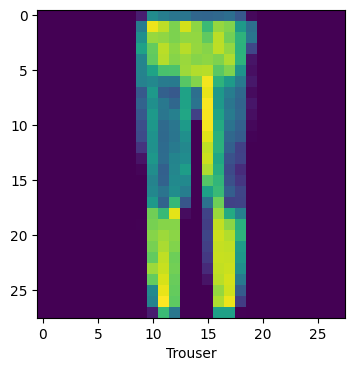

In [60]:
plot_sample(X_test, y_test,3)

In [61]:
class_names[y_class_names[3]]

'Trouser'